# Predicción del Consumo Eléctrico en Colombia

## 1. Introducción

El sector energético de un país es uno de los más importantes, ya que de este dependen prácticamente todas las actividades económicas, y por ende, está relacionado directamente con el desarrollo y progreso de la nación. En este proyecto se realiza una predicción del consumo eléctrico en Colombia a partir de los datos históricos obtenidos de la Base de Datos y Publicaciones Estadísticas CEPALSTAT, en donde se recogen los datos de pérdidas del sector eléctrico y proporción de pérdidas entre los años 1970 y 2020. A partir de estos datos se calcula el consumo eléctrico anual histórico y posteriormente se realiza una predicción para los años posteriores a 2020.  

## 1.1. Objetivo General

- Realizar una predicción del consumo eléctrico anual a partir del año 2020.

## 1.2. Objetivos Específicos

- Calcular el consumo eléctrico histórico a partir de los datos.
- Establecer un modelo predictivo acorde al tipo y volumen de los datos.
- Realizar la predicción y evaluación de los resultados.

## 1.3. Datasets

- Pérdidas en el sector eléctrico: https://statistics.cepal.org/portal/databank/index.html?indicator_id=4234&lang=es
- Porcentaje de pérdidas: https://statistics.cepal.org/portal/databank/index.html?indicator_id=4235&lang=es 

## 2. Carga de los Datasets

In [1]:
import pandas as pd

df_perdidas = pd.read_excel("Valor de pérdidas eléctricas Colombia 1970-2020.xlsx")
df_porcentaje = pd.read_excel("Proporción pérdidas eléctricas Colombia 1970-2020.xlsx")

In [2]:
df_perdidas.head()

,indicator,País__ESTANDAR,Años__ESTANDAR,value,unit,notes_ids,source_id
0,Pérdidas del sector eléctrico,Colombia,1970,684.6580,Miles de barriles equivalentes de petróleo,NaN,714
1,Pérdidas del sector eléctrico,Colombia,1971,846.3736,Miles de barriles equivalentes de petróleo,NaN,714
2,Pérdidas del sector eléctrico,Colombia,1972,938.6940,Miles de barriles equivalentes de petróleo,NaN,714
3,Pérdidas del sector eléctrico,Colombia,1973,619.6000,Miles de barriles equivalentes de petróleo,NaN,714
4,Pérdidas del sector eléctrico,Colombia,1974,1189.0124,Miles de barriles equivalentes de petróleo,NaN,714


In [3]:
df_perdidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indicator       51 non-null     object 
 1   País__ESTANDAR  51 non-null     object 
 2   Años__ESTANDAR  51 non-null     int64  
 3   value           51 non-null     float64
 4   unit            51 non-null     object 
 5   notes_ids       0 non-null      float64
 6   source_id       51 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


In [4]:
df_porcentaje.head()

,indicator,País__ESTANDAR,Años__ESTANDAR,value,unit,notes_ids,source_id
0,Proporción de las pérdidas del sector eléctric...,Colombia,1970,11.996526,Porcentaje,NaN,714
1,Proporción de las pérdidas del sector eléctric...,Colombia,1971,14.176007,Porcentaje,NaN,714
2,Proporción de las pérdidas del sector eléctric...,Colombia,1972,14.001848,Porcentaje,NaN,714
3,Proporción de las pérdidas del sector eléctric...,Colombia,1973,8.549932,Porcentaje,NaN,714
4,Proporción de las pérdidas del sector eléctric...,Colombia,1974,14.497243,Porcentaje,NaN,714


In [5]:
df_porcentaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indicator       51 non-null     object 
 1   País__ESTANDAR  51 non-null     object 
 2   Años__ESTANDAR  51 non-null     int64  
 3   value           51 non-null     float64
 4   unit            51 non-null     object 
 5   notes_ids       0 non-null      float64
 6   source_id       51 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


## 2.1. Preprocesamiento

In [6]:
# Filtrar y renombrar las columnas a utilizar
perdidas = df_perdidas[["Años__ESTANDAR","value"]]
perdidas = perdidas.rename(columns={"Años__ESTANDAR":"Año","value":"Pérdidas"})
porcentaje = df_porcentaje[["Años__ESTANDAR","value"]]
porcentaje = porcentaje.rename(columns={"Años__ESTANDAR":"Año","value":"% pérdidas"})

In [7]:
# Unir dataframes
total = perdidas.merge(porcentaje, left_on="Año", right_on="Año")
total.head()

,Año,Pérdidas,% pérdidas
0,1970,684.6580,11.996526
1,1971,846.3736,14.176007
2,1972,938.6940,14.001848
3,1973,619.6000,8.549932
4,1974,1189.0124,14.497243


In [8]:
# Comprobación de valores faltantes
total.isnull().sum(axis=0)

Año           0
Pérdidas      0
% pérdidas    0
dtype: int64

In [9]:
# Establecer la columna "Año" como índice
df_total = total
df_total.index = df_total.Año
df_total.sort_index(inplace=True)
df_total = df_total.drop(columns="Año")
df_total.head()

,Pérdidas,% pérdidas
Año,,
1970,684.6580,11.996526
1971,846.3736,14.176007
1972,938.6940,14.001848
1973,619.6000,8.549932
1974,1189.0124,14.497243


## 3. Cálculo del Consumo Eléctrico Histórico

Las pérdidas están dadas en barriles equivalentes de petróleo, convirtiendo esto a GWh obtenemos el siguiente dataframe (1 barril de petróleo = 0.00169941 GWh).

In [10]:
df_total["Pérdidas"] = df_total["Pérdidas"].apply(lambda x: x*0.00169941)
df_total.head()

,Pérdidas,% pérdidas
Año,,
1970,1.163515,11.996526
1971,1.438336,14.176007
1972,1.595226,14.001848
1973,1.052954,8.549932
1974,2.020620,14.497243


In [11]:
# Cálculo del consumo
consumo = df_total
consumo["Consumo"] = consumo.apply(lambda x: ((x[0]*100)/x[1])-x[0], axis=1)
consumo = consumo[["Consumo","Pérdidas","% pérdidas"]]

# Redondeo de cifras decimales
consumo = consumo.round(3)
consumo.head()

,Consumo,Pérdidas,% pérdidas
Año,,,
1970,8.535,1.164,11.997
1971,8.708,1.438,14.176
1972,9.798,1.595,14.002
1973,11.262,1.053,8.550
1974,11.917,2.021,14.497


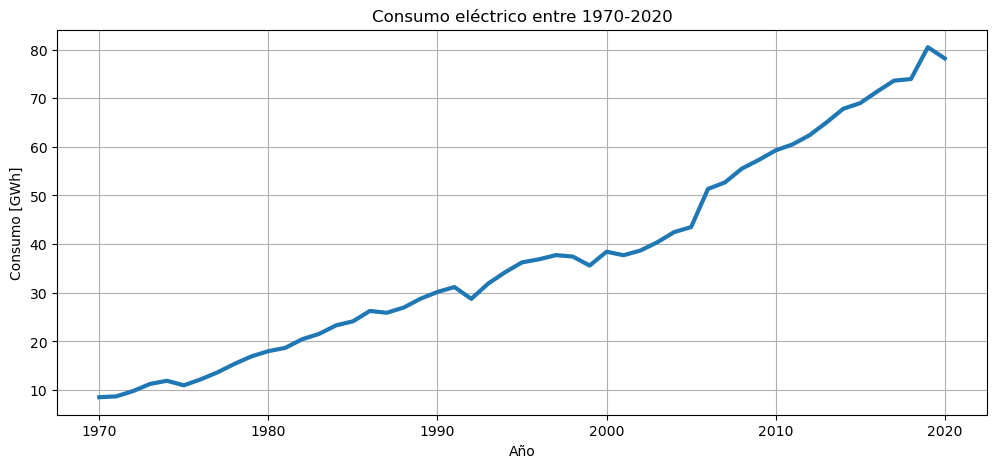

In [12]:
# Gráfica del consumo histórico
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(consumo.Consumo, lw=3)
plt.title("Consumo eléctrico entre 1970-2020")
plt.xlabel("Año")
plt.ylabel("Consumo [GWh]")
plt.grid()
plt.show()

## 4. Predicción del Consumo

La predicción del consumo se realiza mediante el modelo estadístico ARIMA (Autoregressive Integrated Moving Average). Este modelo es adecuado para series de tiempo que no tienen un gran número de datos (50 en este caso), y 
para predicciones a corto plazo.

Para poder emplear este modelo primero se debe convertir la serie de datos en estacionaria. El grado de diferenciación ***(d)*** se obtiene mediante la herramienta Auto-ARIMA.   

## 4.1. Auto-ARIMA

In [13]:
#!pip install pmdarima
import pmdarima as pmd
from sklearn.model_selection import train_test_split

datos = consumo[["Consumo"]]
train, test = train_test_split(datos, test_size=0.2, shuffle=False) # Validación simple

model_auto = pmd.auto_arima(train, max_order=None, max_p=7, max_q=7, test="adf", trace=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=155.861, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=173.825, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=158.840, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=150.794, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=152.367, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=152.491, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=153.893, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.576 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -73.397
Date:                Sun, 25 Jun 2023   AIC                            150.794
Time:                        21:53:39   BIC     

---
Según esto, el mejor modelo es el ***ARIMA(p=3, d=2, q=0)***; pero solo se toma como referencia el término ***d=2***, mientras 
que ***p*** y ***q*** se obtienen analizando la serie estacionaria ***(diferenciada con d=2)***.

Para obtener el orden del término ***p*** (autoregressive) se analiza la autocorrelación parcial de la serie
estacionaria. 

C:\Users\MAURICIO\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


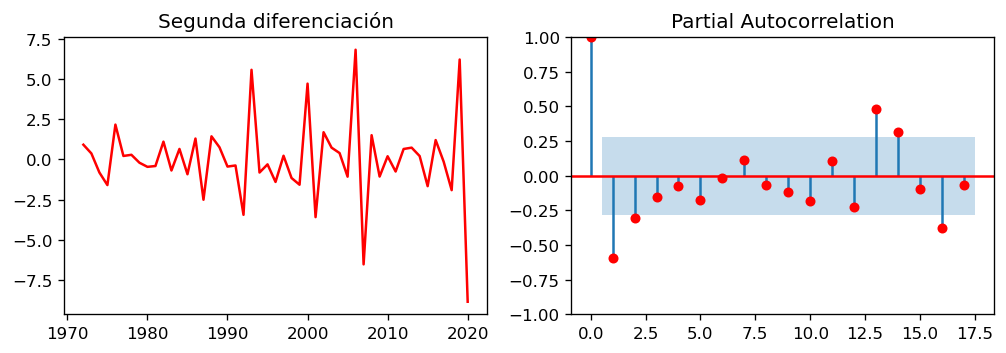

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams.update({"figure.figsize":(10,3), "figure.dpi":120})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(consumo.Consumo.diff().diff(), color="r")
axes[0].set_title("Segunda diferenciación")
plot_pacf(consumo.Consumo.diff().diff().dropna(), ax=axes[1], color="r")
plt.show()

import warnings
warnings.filterwarnings('ignore')

---
De la autocorrelación parcial se determina que ***p=4***.

Para obtener el término ***q*** (moving average) se analiza la autocorrelación simple de la serie
estacionaria.

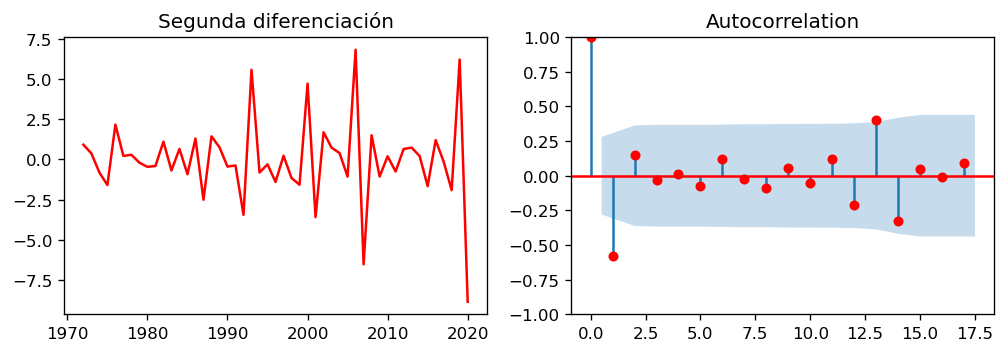

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams.update({"figure.figsize":(10,3), "figure.dpi":120})
fig,axes=plt.subplots(1, 2, sharex=False)
axes[0].plot(consumo.Consumo.diff().diff(), color="r")
axes[0].set_title("Segunda diferenciación")
plot_acf(consumo.Consumo.diff().diff().dropna(), ax=axes[1], color="r")
plt.show()

---
De la autocorrelación simple se determina que ***q=1***.

Así, el modelo a utilizar para la predicción es el ***ARIMA(4,2,1)***. 

## 4.2. Configuración del Modelo

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

model_421 = ARIMA(train, order=(4,2,1))
fitted_421 = model_421.fit()
forecast = fitted_421.forecast(16, alpha=0.05, 
                               index=np.arange(2010,2026,1)).round(3)

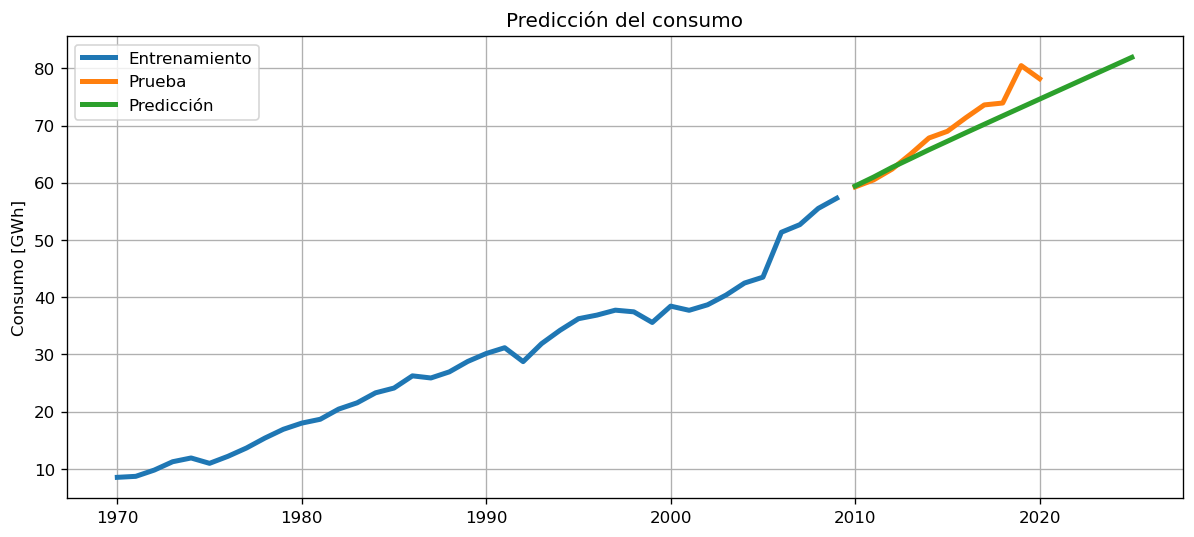

In [17]:
# Gráfica de los valores de predicción
plt.figure(figsize=(12,5))
plt.plot(train, label="Entrenamiento", lw=3)
plt.plot(test, label="Prueba", lw=3)
plt.plot(forecast, label="Predicción", lw=3)
plt.title("Predicción del consumo")
plt.ylabel("Consumo [GWh]")
plt.legend(loc="upper left", fontsize=10)
plt.grid()
plt.show()

## 4.3. Métricas de Evaluación del Modelo

In [18]:
from sklearn import metrics

def evaluation_metrics(true, pred):
    def mape(true, pred):
        true, pred = np.array(true), np.array(pred)
        return np.mean(np.abs((true-pred)/true))*100
    print("Resultados de las métricas del modelo ARIMA(4,2,1):\n")
    print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(true, pred)),3)}")   
    print(f"MAE: {round(metrics.mean_absolute_error(true, pred),3)}")
    print(f"MAPE: {round(mape(true, pred),3)}")
    return [round(np.sqrt(metrics.mean_squared_error(true, pred)),3),   
            round(metrics.mean_absolute_error(true, pred),3),
            round(mape(true, pred),3)]

forecast_metrics = fitted_421.forecast(11, alpha=0.05, index=np.arange(2010,2021,1))

metrics_421 = evaluation_metrics(test, forecast_metrics)

# Métricas del modelo generado por Auto-ARIMA
model_320 = ARIMA(train, order=(3,2,0))
fitted_320 = model_320.fit()
forecast_320_metrics = fitted_320.forecast(11, alpha=0.05,
                                           index=np.arange(2010,2021,1))
forecast_320 = fitted_320.forecast(16, alpha=0.05, 
                                   index=np.arange(2010,2026,1)).round(3)

def evaluation_metrics(true, pred):
    def mape(true, pred):
        true, pred = np.array(true), np.array(pred)
        return np.mean(np.abs((true-pred)/true))*100
    print("\nResultados de las métricas del modelo ARIMA(3,2,0):\n")
    print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(true, pred)),3)}")   
    print(f"MAE: {round(metrics.mean_absolute_error(true, pred),3)}")
    print(f"MAPE: {round(mape(true, pred),3)}")
    return [round(np.sqrt(metrics.mean_squared_error(true, pred)),3),   
            round(metrics.mean_absolute_error(true, pred),3),
            round(mape(true, pred),3)]

metrics_320 = evaluation_metrics(test, forecast_320_metrics)

Resultados de las métricas del modelo ARIMA(4,2,1):

RMSE: 2.981
MAE: 2.242
MAPE: 9.915

Resultados de las métricas del modelo ARIMA(3,2,0):

RMSE: 5.752
MAE: 5.276
MAPE: 14.756


## 4.4. Comparación de Errores

In [19]:
df_320 = pd.DataFrame(metrics_320, index=["RMSE","MAE","MAPE"])
df_421 = pd.DataFrame(metrics_421, index=["RMSE","MAE","MAPE"])
metrics = df_320.merge(df_421, on=df_320.index)
metrics.columns = ["Métrica","ARIMA(3,2,0)","ARIMA(4,2,1)"]
metrics.index = metrics["Métrica"]
metrics = metrics.drop(columns="Métrica")
metrics

,"ARIMA(3,2,0)","ARIMA(4,2,1)"
Métrica,,
RMSE,5.752,2.981
MAE,5.276,2.242
MAPE,14.756,9.915


## 5. Visualización (Power BI)

La siguiente imagen resume los resultados de las predicciones realizadas; tanto con el modelo sugerido por la herramienta Auto-ARIMA (azul marino), como con el modelo configurado a partir del análisis de la serie de tiempo (azul celeste). De igual manera, se muestra la comparación de las métricas de evaluación de estos dos modelos.

![Reporte](Reporte_informe.jpg)

## 6. Conclusiones

- El modelo estadístico ARIMA es el más indicado a la hora de realizar predicciones sobre series de tiempo con un set de datos de volumen limitado. En caso de que se hubiese implementado un modelo de Machine Learning, el set de datos habría sido insufieciente para obtener resultados representativos.
- El modelo ARIMA arroja buenos resultados haciendo predicciones a corto plazo.
- La herramienta Auto-ARIMA no es del todo confiable, en este caso se tuvo que hacer un análisis complementario para obtener resultados de predicciones con el menor error posible.